## **Hyperparameter Tuning with GridSearchCV**

**Goal:** Use GridSearchCV to tune hyperparameters for an SVM classifier on the Iris dataset
and improve performance.

**Install Required Libraries**

In [3]:
!pip install scikit-learn seaborn matplotlib
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Load and Explore the Iris Dataset**

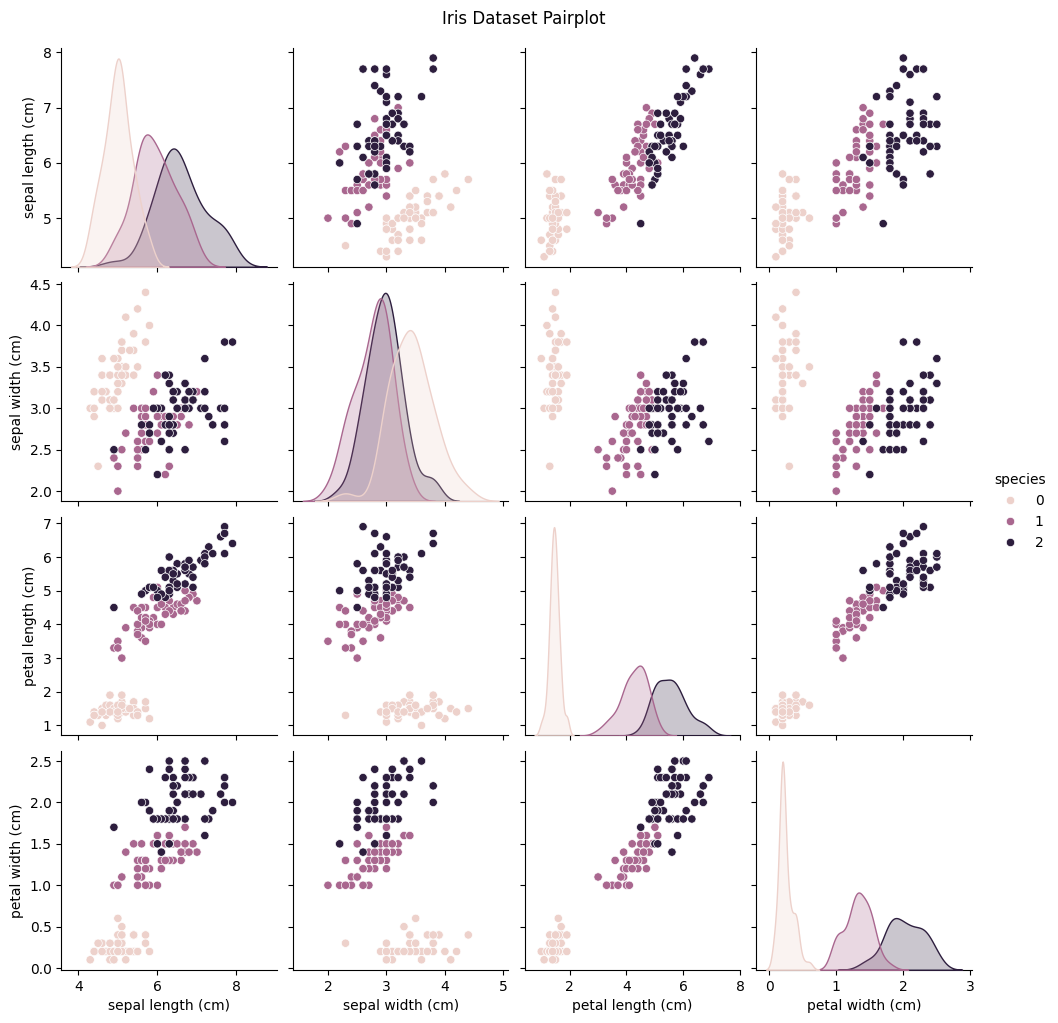

In [5]:
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
# Convert to DataFrame for EDA
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target
# Plot pairplot
sns.pairplot(df, hue='species')
plt.suptitle("Iris Dataset Pairplot", y=1.02)
plt.show()

**Split Dataset**

In [6]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Define the Model and Parameters**

In [8]:
# Define parameter grid
param_grid = {
'C': [0.1, 1, 10, 100],            # Regularization strength
'gamma': [1, 0.1, 0.01, 0.001],    # Kernel coefficient
'kernel': ['rbf']                  # Type of kernel
}
# Create SVM model
svc = SVC()

**Apply GridSearchCV**

In [10]:
# Define a range of hyperparameters to try
param_grid = {
    'C': [0.1, 1, 10, 100],         # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001], # Kernel coefficient
    'kernel': ['rbf']               # Using Radial Basis Function kernel
}

# Create an SVM classifier
svc = SVC()

# Perform grid search with 5-fold cross-validation to find best hyperparameters
grid = GridSearchCV(
    svc,
    param_grid,
    cv=5,
    verbose=1,
    scoring='accuracy',
    n_jobs=-1  # Use all CPU cores
)

# Fit the model to the training data
grid.fit(X_train, y_train)

# Print best parameters and the best cross-validation score
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9583333333333334


**Evaluate on Test Set**

Test Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



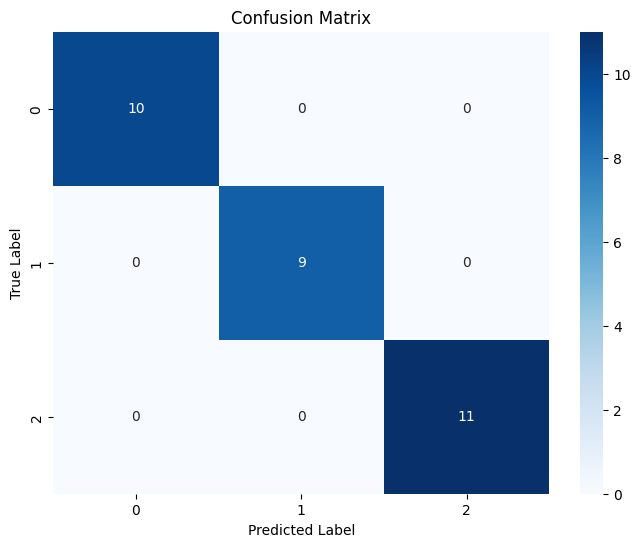

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test data using the best model found by GridSearchCV
y_pred = grid.best_estimator_.predict(X_test)

# Evaluate the model performance
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


##**Final Summary**
In this project, we trained a Support Vector Machine (SVM) classifier on the Iris dataset to classify iris flower species based on four features (sepal and petal length/width). The steps included data visualization, preprocessing, model training, and hyperparameter tuning.

✅ **Model Used:** SVM (Support Vector Classifier) with RBF kernel

🔍 **Hyperparameter Tuning:** GridSearchCV with 5-fold cross-validation

🏆 **Best Parameters:** C = 1, gamma = 1, kernel = 'rbf'

📈 **Best Cross-Validation Accuracy**: 95.83%

🧪 **Test Accuracy:** 100%

📊 **Evaluation Metrics:** Perfect precision, recall, and f1-score for all three iris species (Setosa, Versicolor, Virginica)

✅ The model performed exceptionally well on both the training and test sets, making it a successful and accurate classifier for the Iris dataset.